# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import datetime
import random
import torch
import numpy as np
import datetime
from collections import deque
#plot
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import json
config = json.load(open('HyperParamsConfig.json'))

# Hyperparameters
SEED = config["SEED"]
GAMMA = config['GAMMA']            # discount factor
TAU = config['TAU']              # for soft update of target parameters
LR_ACTOR = config['LR_ACTOR']        # learning rate of the actor 
LR_CRITIC = config['LR_CRITIC']        # learning rate of the critic
BUFFER_SIZE = config["BUFFER_SIZE"]
BATCH_SIZE = config["BATCH_SIZE"]


In [3]:
print (SEED)

1


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [4]:
env = UnityEnvironment(file_name=".\Tennis_Windows_x86_64\Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [7]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.09000000171363354


When finished, you can close the environment.

In [8]:
#DeepDeterminsticPolicyGradient DDPG
from nn_model import Actor , Critic
from agent import DDPGAgent

#Test to create the instance of AiAgent
ddpgAgent = DDPGAgent(state_size,action_size,random_seed=SEED)
print(ddpgAgent.actor_local)
print(ddpgAgent.critic_local)

Actor(
  (fc1): Linear(in_features=24, out_features=256, bias=True)
  (batch): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=2, bias=True)
  (dropout): Dropout(p=0.02, inplace=False)
)
Critic(
  (fcs1): Linear(in_features=24, out_features=256, bias=True)
  (batch): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=258, out_features=128, bias=True)
  (dropout): Dropout(p=0.02, inplace=False)
  (fc3): Linear(in_features=128, out_features=1, bias=True)
)


In [9]:
#DeepDeterminsticPolicyGradient DDPG
from nn_model import Actor , Critic
from DDPGMultiAgent import DDPGMultiAgent
from agent import ReplayBuffer

#Test to create the instance of AiAgent
colabAI = DDPGMultiAgent(state_size,action_size,num_agents)
replayMemory =  ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, SEED)



In [10]:
print(colabAI.multiagent)

[<agent.DDPGAgent object at 0x000001C35DF6E5C0>, <agent.DDPGAgent object at 0x000001C35DF869B0>]


In [11]:
env_info = env.reset(train_mode=True)[brain_name]       
#set initial state
state = env_info.vector_observations 
print(state) 
type(state)


#actions = [ agent.act(env_states) for agent,obs in zip(colabAI,env_states)]

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -7.98782539 -1.5
  -0.          0.         -7.11741829  5.97645617 -0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -7.28886175 -1.5
   0.          0.          7.11741829  5.97645617  0.          0.        ]]


numpy.ndarray

In [12]:
type(colabAI)
#env.close()

DDPGMultiAgent.DDPGMultiAgent

In [13]:

multiagent = [DDPGAgent (state_size,action_size) for agent in range(num_agents)]
actions = [ agent.act(states) for agent,states in zip(multiagent,state)]
print (actions)
type(actions)

[array([0.4331095 , 0.10407504], dtype=float32), array([0.04096466, 0.23198903], dtype=float32)]


list

In [12]:
# Deep Determinsitic Policy Gradient Algorithm
# Policy Based -Actor Critic Method
# Changes:
#Learning from Replay memory 
# Model weights savings code

n_episodes=1000
#counters
agent_scores=np.zeros(num_agents)          # 
episodes_score = []                         #Score counter to store each Episode score
scores_window = deque(maxlen=100)          #Window for every 100 episodes
avg_score =[]
state=0
    
for i_episode in range(1, n_episodes+1):
    #reset the unity Env_info for each new episode
    env_info = env.reset(train_mode=True)[brain_name]
    #Scores got by each agent in current episode
    agent_scores=np.zeros(num_agents)          
               
    #set initial state
    state = env_info.vector_observations  #Current state 
    #colabAI.reset()
    rewards = 0
        
    #For each Episode,  take max steps and record the state and reward information until Episode complete   
    while True: # t in range(max_t):
        #Select action based on  policy based
        actions = colabAI.act(state)
        actions = np.clip(actions, -1, 1)          #all actions between -1 and 1
           
        env_info = env.step(actions)[brain_name]   #Perform 'action'
        next_state = env_info.vector_observations #Next env state info 
        rewards = env_info.rewards                 #reward +0.1 for every timestep
        done   = env_info.local_done              #Episode complete
        agent_scores += rewards                          #Accumulate Rewards
        state = next_state                        #mark new state as current state
            #episode_reward+=rewards
            
        if np.any(done):
            [replayMemory.add(state[i], actions[i],sum(rewards),next_state[i],done[i])  for i in range(num_agents)]
            ep_score = np.max(agent_scores)
            episodes_score.append(ep_score)              #Max Score for each episode
            scores_window.append(ep_score)             #Print the windows score
            avg_score.append(np.mean(scores_window))
            #Learn from Experience from the random samples from Replay Memory
            if len(replayMemory) > BATCH_SIZE:
                for iAgent in range(num_agents):
                    colabAI.learn(replayMemory.sample(), iAgent)
            break
            
    #Episode scores
    if i_episode % 10 == 0 and ep_score >0.0:
        print('\rScore (max over agents) from episode {} : {} \t Avg Score: {}'.format(i_episode, ep_score,np.mean(avg_score)))
        #torch.save(colabAI.actor_local.state_dict(), 'checkpoint_actor.pth')
        #torch.save(colabAI.critic_local.state_dict(), 'checkpoint_critic.pth')
    if np.mean(scores_window)>=0.5 :#and i_episode>900: 
        print('\nEnvironment solved in {:d} episodes!\tMax Score: {:.4f}'.format(i_episode, np.max(scores)))
        critics = [agent_ddpg.critic_local for agent_ddpg in colabAI]
        actors  = [agent_ddpg.actor_local for agent_ddpg in colabAI]
        for actor in actors:
            torch.save(actor.state_dict(), 'checkpoint_actor5.pth')
        for critic in critics:
            torch.save(critic.state_dict(), 'checkpoint_critic5.pth')
        break  
                   
   # return rewards_plot

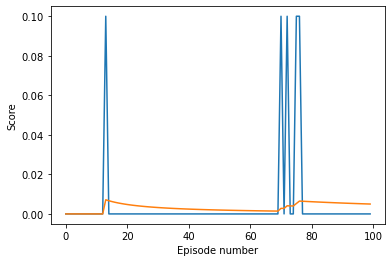

In [13]:
#Episode 10000 
target_score =0.5
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(episodes_score)), episodes_score)
plt.plot(np.arange(len(avg_score)), avg_score)
#plt.plot(np.arange(len(episodes_score)), target_score*np.ones(len(episodes_score)))
plt.xlabel('Episode number')
plt.ylabel('Score')
#plt.savefig('graph_trained_{:d}_episodes'.format(len(scores)), format='png')
plt.show()

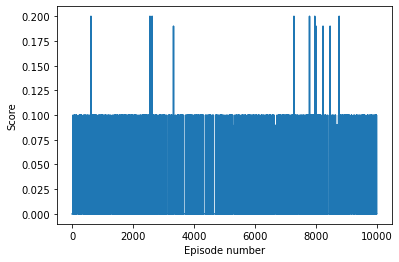

In [22]:
#Episode 10000 
target_score =0.5
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(episodes_score)), episodes_score)
#plt.plot(np.arange(len(avg_score)), avg_score)
#plt.plot(np.arange(len(episodes_score)), target_score*np.ones(len(episodes_score)))
plt.xlabel('Episode number')
plt.ylabel('Score')
#plt.savefig('graph_trained_{:d}_episodes'.format(len(scores)), format='png')
plt.show()

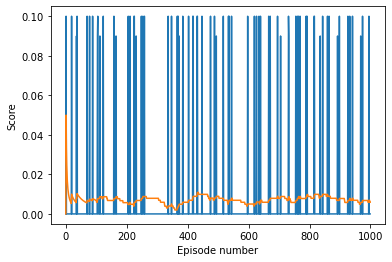

In [19]:
#Episode 1000 
target_score =0.5
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(episodes_score)), episodes_score)
plt.plot(np.arange(len(avg_score)), avg_score)
#plt.plot(np.arange(len(episodes_score)), target_score*np.ones(len(episodes_score)))
plt.xlabel('Episode number')
plt.ylabel('Score')
#plt.savefig('graph_trained_{:d}_episodes'.format(len(scores)), format='png')
plt.show()

In [44]:
env.close()

In [41]:
# Deep Determinsitic Policy Gradient Algorithm
# Policy Based -Actor Critic Method
# Changes:
#Reward plot for Avg Agent's score for each episode
#Added learning at every state change

#def Ddpg(n_episodes=1000, max_t=300, print_every=100):
n_episodes=10000
#counters
agent_scores=np.zeros(num_agents)          # 
episodes_score = []                         #Score counter to store each Episode score
scores_window = deque(maxlen=100)          #Window for every 100 episodes
avg_score =[]
state=0
multiagent = [DDPGAgent (state_size,action_size) for agent in range(num_agents)]
            
for i_episode in range(1, n_episodes+1):
    #reset the unity Env_info for each new episode
    env_info = env.reset(train_mode=True)[brain_name]
    #Scores got by each agent in current episode
    agent_scores=np.zeros(num_agents)          
               
    #set initial state
    state = env_info.vector_observations  #Current state 
    #colabAI.reset()
    rewards = 0
        
    #For each Episode,  take max steps and record the state and reward information until Episode complete   
    while True: # t in range(max_t):
        #Select action based on  policy based
        actions = [ agent.act(states) for agent,states in zip(multiagent,state)]
        #action = colabAI.act(state)
        actions = np.clip(actions, -1, 1)          #all actions between -1 and 1
           
        env_info = env.step(actions)[brain_name]   #Perform 'action'
                       
        next_state = env_info.vector_observations #Next env state info 
        #next_state =concatStates(env_info.vector_observations)
        rewards = env_info.rewards                 #reward +0.1 for every timestep
        done   = env_info.local_done              #Episode complete
        agent_scores += rewards                          #Accumulate Rewards
        state = next_state                        #mark new state as current state
        #episode_reward+=rewards
            
        if np.any(done):
            [agent.step(state[i], actions[i],sum(rewards),next_state[i],done[i])  for agent,i in zip(multiagent,range(num_agents))]
            ep_score = np.max(agent_scores)
            episodes_score.append(ep_score)              #Max Score for each episode
            scores_window.append(ep_score)             #Print the windows score
            avg_score.append(np.mean(scores_window))
            break             
            
        #Uncomment when you want to check the scores for  each episode 
        #print('Score (max over agents) from episode {}\t: {}'.format(i_episode,np.max(scores)))  
        
    if i_episode % 10 == 0 and ep_score >0.0:
        print('\rScore (max over agents) from episode {} : {} \t Avg Score: {}'.format(i_episode, ep_score,np.mean(avg_score)))
        torch.save(ddpgAgent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(ddpgAgent.critic_local.state_dict(), 'checkpoint_critic.pth')
    if np.mean(scores_window)>=0.5 :#and i_episode>900: 
        print('\nEnvironment solved in {:d} episodes!\tMax Score: {:.4f}'.format(i_episode, np.max(scores)))
        torch.save(ddpgAgent.actor_local.state_dict(), 'checkpoint_actor5.pth')
        torch.save(ddpgAgent.critic_local.state_dict(), 'checkpoint_critic5.pth')
        break
              
                   
   # return rewards_plot

Score (max over agents) from episode 100 : 0.10000000149011612 	 Avg Score: 0.0017170139092872747
Score (max over agents) from episode 440 : 0.10000000149011612 	 Avg Score: 0.006142957805823426
Score (max over agents) from episode 590 : 0.10000000149011612 	 Avg Score: 0.005550680412009783
Score (max over agents) from episode 1980 : 0.10000000149011612 	 Avg Score: 0.002949798728489491
Score (max over agents) from episode 4870 : 0.10000000149011612 	 Avg Score: 0.0018439428197138022
Score (max over agents) from episode 4970 : 0.10000000149011612 	 Avg Score: 0.0019013886397526744
Score (max over agents) from episode 5000 : 0.10000000149011612 	 Avg Score: 0.0019060603081582394
Score (max over agents) from episode 5020 : 0.10000000149011612 	 Avg Score: 0.0019142034944308554
Score (max over agents) from episode 6670 : 0.10000000149011612 	 Avg Score: 0.0018331186780830525
Score (max over agents) from episode 6820 : 0.10000000149011612 	 Avg Score: 0.0018971996471295583
Score (max over 

In [10]:
#Replay memory needs to be check()

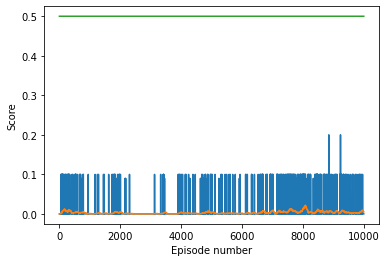

In [43]:
target_score =0.5
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(episodes_score)), episodes_score)
plt.plot(np.arange(len(avg_score)), avg_score)
plt.plot(np.arange(len(episodes_score)), target_score*np.ones(len(episodes_score)))
plt.xlabel('Episode number')
plt.ylabel('Score')
#plt.savefig('graph_trained_{:d}_episodes'.format(len(scores)), format='png')
plt.show()

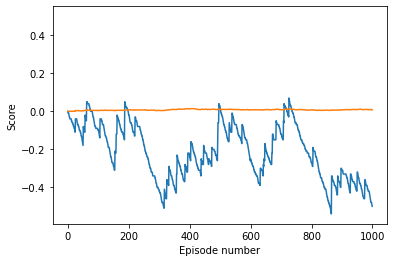

In [64]:
target_score =0.5
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(rewards_plot)), rewards_plot)
plt.plot(np.arange(len(avg_score)), avg_score)
plt.plot(np.arange(len(scores)), target_score*np.ones(len(scores)))
plt.xlabel('Episode number')
plt.ylabel('Score')
#plt.savefig('graph_trained_{:d}_episodes'.format(len(scores)), format='png')
plt.show()

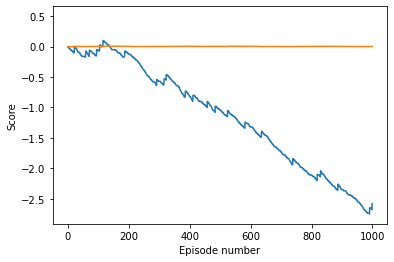

In [62]:
target_score =0.5
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(rewards_plot)), rewards_plot)
plt.plot(np.arange(len(avg_score)), avg_score)
plt.plot(np.arange(len(scores)), target_score*np.ones(len(scores)))
plt.xlabel('Episode number')
plt.ylabel('Score')
#plt.savefig('graph_trained_{:d}_episodes'.format(len(scores)), format='png')
plt.show()

In [53]:
#start = datetime.datetime.now()
#print (start)
#scores = Ddpg(n_episodes=1000)
#endtime = datetime.datetime.now() -start
#print (endtime)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

0 : -1.689999869093299 	 Avg Score: 0.004811973152294055
Score (max over agents) from episode 870 : -1.7399998679757118 	 Avg Score: 0.00481298495602333
Score (max over agents) from episode 880 : -1.7899998668581247 	 Avg Score: 0.004813973764213304
Score (max over agents) from episode 890 : -1.8499998655170202 	 Avg Score: 0.004814940351994513
Score (max over agents) from episode 900 : -1.9099998641759157 	 Avg Score: 0.004815885460047253
Score (max over agents) from episode 910 : -1.9699998628348112 	 Avg Score: 0.004803293312747884
Score (max over agents) from episode 920 : -2.019999861717224 	 Avg Score: 0.004783692298964794
Score (max over agents) from episode 930 : -1.9599998593330383 	 Avg Score: 0.004761287005860153
Score (max over agents) from episode 940 : -2.0299998577684164 	 Avg Score: 0.004742549910528699
Score (max over agents) from episode 950 : -2.0799998566508293 	 Avg Score: 0.004704207280064093
Score (max over agents) from episode 960 : -2.1299998555332422 	 Avg Sco

KeyboardInterrupt: 

In [42]:
start = datetime.datetime.now()
print (start)
scores = Ddpg(n_episodes=300)
endtime = datetime.datetime.now() -start
print (endtime)

2020-08-02 19:44:16.857436
Score (max over agents) from episode 10 : -0.03999999910593033 	 Avg Score: -0.012221428298258358
Score (max over agents) from episode 20 : -0.07999999821186066 	 Avg Score: -0.02333981962333962
Score (max over agents) from episode 30 : -0.12999999709427357 	 Avg Score: -0.03388082680752687
Score (max over agents) from episode 40 : -0.17999999597668648 	 Avg Score: -0.04468356868891908
Score (max over agents) from episode 50 : -0.20999999530613422 	 Avg Score: -0.0557177094369361
Score (max over agents) from episode 60 : -0.24999999441206455 	 Avg Score: -0.06637619300201163
Score (max over agents) from episode 70 : -0.279999990016222 	 Avg Score: -0.07686347117152002
Score (max over agents) from episode 80 : -0.23999999091029167 	 Avg Score: -0.08706183858170312
Score (max over agents) from episode 90 : -0.2899999897927046 	 Avg Score: -0.09625226245016939
Score (max over agents) from episode 100 : -0.31999998912215233 	 Avg Score: -0.10482343589401054
Score

In [12]:
env.close()

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [29]:
 m = nn.Dropout(p=0.5)
 print(m)
 input = torch.from_numpy(np.zeros(1, 1),)
 output = m(input)
 output

Dropout(p=0.5, inplace=False)


TypeError: data type not understood

In [25]:
input

tensor([[0.1210]])

In [ ]:
### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```